# Selección de variables

por Mónica Tatiana Gutierrez Ballen

version 1.0, Agosto 2021

This notebook is licensed under a [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US). Special thanks goes to [Rick Muller](http://www.cs.sandia.gov/~rmuller/), Sandia National Laboratories

# ¿Por qué hacer selección de variables?

Cuando se construye un modelo de aprendizaje automático en la vida real, es casi raro que todas las variables del conjunto de datos sean útiles para construir un modelo. Añadir variables redundantes reduce la capacidad de generalización del modelo y también puede reducir la precisión global de un clasificador. Además, añadir más y más variables a un modelo aumenta la complejidad general del mismo.

Según la Ley de Parsimonia de la "[Navaja de Occam](https://es.wikipedia.org/wiki/Navaja_de_Ockham)", la mejor explicación a un problema es la que implica el menor número posible de supuestos. Por lo tanto, la selección de características se convierte en una parte indispensable de la construcción de modelos de aprendizaje automático.


## Objetivo

El objetivo de la selección de características en el aprendizaje automático es encontrar el mejor conjunto de características que permita construir modelos útiles de los fenómenos estudiados.

"El objetivo de la selección de variables es triple: mejorar el rendimiento de predicción de los predictores, proporcionar predictores más rápidos y rentables y proporcionar una mejor comprensión del proceso subyacente que generó los datos".

[Introducción a la selección de características y variables](https://jmlr.csail.mit.edu/papers/volume3/guyon03a/guyon03a.pdf)

## Diferencia entre la *reducción de dimensionalidad* y *la selección de características*.

A veces, la selección de características se confunde con la reducción de dimensionalidad. Pero son diferentes. La selección de características es diferente a la reducción de dimensionalidad. Ambos métodos tienden a reducir la cantidad de atributos en el conjunto de datos, pero un método de reducción de dimensionalidad lo hace creando nuevas combinaciones de atributos (a veces conocidas como transformación de características), mientras que los métodos de selección de características incluyen y excluyen atributos presentes en los datos sin cambiarlos.

## Tipos de métodos para selección de variables 

Desde un punto de vista taxonómico, estas [técnicas](https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/) se clasifican en

1. Métodos de filtrado

2. Métodos de envoltura

3. Métodos embebidos



In [1]:
# read in and prepare the churn data
# Download the dataset
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/churn.csv'
data = pd.read_csv(url)

# Create X and y

columns = [1,2,6,7,8,9,10]
# Select only the numeric features
X = data.iloc[:, columns].astype(np.float)
# Convert bools to floats
X = X.join((data.iloc[:, [4,5]] == 'no').astype(np.float))

y = (data.iloc[:, -1] == 'True.').astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17

## Métodos de filtrado

In [2]:
from IPython.display import Image
Image(url= "https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1537552825/Image3_fqsh79.png", width=900)


El método de filtro se basa en la unicidad general de los datos que se evaluarán y el **subconjunto** de características de selección, sin incluir ningún algoritmo de minería. El método de filtro utiliza el criterio de evaluación exacto que incluye distancia, información, dependencia y coherencia. Además utiliza los criterios principales de la técnica de clasificación y utiliza el método de ordenación por clasificación para la selección de variables. La razón para utilizar el método de clasificación es la *simplicidad*, produce características excelentes y relevantes. El método de clasificación filtrará las características irrelevantes antes de que comience el proceso de clasificación.

Los métodos de filtrado se utilizan generalmente como un paso de preprocesamiento de datos. La selección de funciones es independiente de cualquier algoritmo de aprendizaje automático. Las características otorgan una clasificación sobre la base de puntuaciones estadísticas que tienden a determinar la correlación de las características con la variable de resultado. La correlación es un término muy contextual y varía de un trabajo a otro. Puede consultar la siguiente tabla para definir coeficientes de correlación para diferentes tipos de datos (en este caso continuos y categóricos).

| Variable/Respuesta | Continua                        | Categórica                          |
|--------------------|---------------------------------|-------------------------------------|
| Continua           | Correlación de Pearson/Spearman | Análisis discriminante linear (LDA) |
| Categórica         | Anova                           | Chi-cuadrado                        |

### [Eliminar los rasgos constantes y cuasi-constantes](https://www.kaggle.com/prashant111/comprehensive-guide-on-feature-selection)

Las características constantes son aquellas que muestran el mismo valor, sólo un valor, para todas las observaciones del conjunto de datos. Es decir, el mismo valor para todas las filas del conjunto de datos. Estas características no proporcionan ninguna información que permita a un modelo de aprendizaje automático discriminar o predecir un objetivo.

Las características cuasi-constantes son aquellas que muestran el mismo valor para la gran mayoría de las observaciones del conjunto de datos. En general, estas características proporcionan poca o ninguna información que permita a un modelo de aprendizaje automático discriminar o predecir un objetivo. Pero puede haber excepciones. Por ello, hay que tener cuidado al eliminar este tipo de características.

Identificar y eliminar los rasgos cuasi-constantes es un primer paso sencillo hacia la selección de rasgos y hacia modelos de aprendizaje automático más fáciles de interpretar.

Para identificar las características cuasi-constantes, podemos utilizar una vez más la función VarianceThreshold de sklearn.


Para identificar las variables constantes

In [3]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0)
sel.fit(X) 

print(
    len([
        x for x in X.columns
        if x not in X.columns[sel.get_support()]
    ]))

[x for x in X.columns if x not in X.columns[sel.get_support()]]

0


[]

Para identificar las variables cuasi-constantes

In [4]:
sel = VarianceThreshold(threshold=0.1)  # 0.1 indicates 90% of observations approximately
sel.fit(X) 

print(
    len([
        x for x in X.columns
        if x not in X.columns[sel.get_support()]
    ]))

[x for x in X.columns if x not in X.columns[sel.get_support()]]

1


["Int'l Plan"]

In [5]:
X["Int'l Plan"].value_counts() / np.float(len(X))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


1.0    0.90309
0.0    0.09691
Name: Int'l Plan, dtype: float64

**Ejercicio**: ¿Cuál sería el siguiente paso?

###Ganancia de información

La [ganancia de información](https://machinelearningmastery.com/information-gain-and-mutual-information/) calcula la reducción de la entropía a partir de la transformación de un conjunto de datos. Puede utilizarse para la selección de características evaluando la ganancia de información de cada variable en el contexto de la variable objetivo.


In [6]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

importances = mutual_info_classif(X, y)
importances

array([0.        , 0.        , 0.01199588, 0.05478318, 0.        ,
       0.05527358, 0.00022229, 0.01740934, 0.00062752])

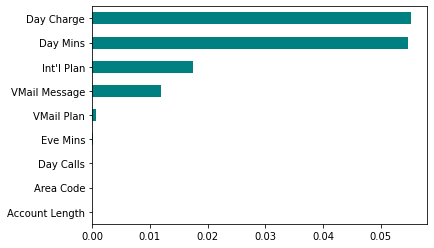

In [7]:
feat_importances = pd.Series(importances, X.columns[0:len(X.columns)])
feat_importances = feat_importances.sort_values(ascending=True)
feat_importances.plot(kind = 'barh',
                      color = 'teal'
                      )
plt.show()

### [Prueba Chi-cuadrado](https://towardsdatascience.com/chi-square-test-with-python-d8ba98117626)

La prueba de Chi-cuadrado se utiliza para las características *categóricas* de un conjunto de datos. Se calcula la Chi-cuadrado entre cada característica y el objetivo y se selecciona el número deseado de características con las mejores puntuaciones de Chi-cuadrado. 

Para aplicar correctamente la chi-cuadrado con el fin de probar la relación entre varias características del conjunto de datos y la variable objetivo, deben cumplirse las siguientes condiciones: las variables deben ser categóricas, muestreadas de forma independiente y los valores deben tener una frecuencia esperada superior a 5.

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#Convierte las características categóricas a enteros
X_cat = X.astype(int)

#Tres características con los chi cuadrados más altos son seleccionados
chi2_features = SelectKBest(chi2,k=3)
X_kbest_features = chi2_features.fit_transform(X_cat, y)

# Obtener columnas para crear un nuevo dataframe con las nuevas variables
cols = chi2_features.get_support(indices=True)
features_df_new = X.iloc[:,cols]
print("Variables seleccionadas:")
print(features_df_new.dtypes)
print("")
print('Número original de variables: ', X.shape[1])
print('Número de variables seleccionadas: ', X_kbest_features.shape[1])


Variables seleccionadas:
VMail Message    float64
Day Mins         float64
Day Charge       float64
dtype: object

Número original de variables:  9
Número de variables seleccionadas:  3


### Valor F de ANOVA para la selección de características

Calcule el valor F de ANOVA para la muestra proporcionada.

Si las características son categóricas, calcularemos un estadístico chi-cuadrado entre cada característica y el vector objetivo. Sin embargo, si las características son cuantitativas, calcularemos el valor F de ANOVA entre cada característica y el vector objetivo.

Las puntuaciones del valor F examinan si, cuando agrupamos la característica *cuantitativa* por el vector objetivo, las medias de cada grupo son significativamente diferentes.



In [9]:
from sklearn.feature_selection import f_classif

fvalue_selector = SelectKBest(f_classif, k=3)
X_kbest_features = fvalue_selector.fit_transform(X_cat, y)

# Obtener columnas para crear un nuevo dataframe con las nuevas variables
cols = fvalue_selector.get_support(indices=True)
features_df_new = X.iloc[:,cols]
print("Variables seleccionadas:")
print(features_df_new.dtypes)
print("")
print('Número original de variables: ', X.shape[1])
print('Número de variables seleccionadas: ', X_kbest_features.shape[1])


Variables seleccionadas:
Day Mins      float64
Day Charge    float64
Int'l Plan    float64
dtype: object

Número original de variables:  9
Número de variables seleccionadas:  3


### Matriz de correlación con mapa de calor 

La correlación de Pearson es una medida de la relación lineal de 2 o más variables *cuantitativas*. Mediante la correlación, podemos predecir una variable a partir de la otra.

* Las buenas variables están altamente correlacionadas con el objetivo.

* Las variables predictoras correlacionadas proporcionan información redundante.

* Las variables deben estar correlacionadas con el objetivo, pero no correlacionadas entre sí.

Al utilizar la correlación de Pearson o Spearman, los valores de los coeficientes que obtenemos varían entre -1 y 1.

* Si la correlación entre dos características es 0, significa que el cambio de cualquiera de estas dos características no afectará a la otra.

* Si la correlación entre dos características es mayor que 0, significa que el aumento de los valores de una característica hará que también aumenten los valores de la otra característica (cuanto más cerca esté el coeficiente de correlación de 1, más fuerte será este vínculo entre las dos características diferentes).

* Si la correlación entre dos características es inferior a 0, significa que el aumento de los valores de una característica hará que disminuyan los valores de la otra característica (cuanto más se acerque el coeficiente de correlación a -1 y más fuerte sea la relación entre las dos características diferentes).


In [10]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [11]:
df = pd.DataFrame(X)
corr_matrix = df.corr()
corr_matrix


,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Int'l Plan,VMail Plan
Account Length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,-0.024735,-0.002918
Area Code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.048551,0.000747
VMail Message,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.008745,-0.956927
Day Mins,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,-0.049396,0.001684
Day Calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,-0.003755,0.011086
Day Charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,-0.049398,0.001686
Eve Mins,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.019100,-0.021545
Int'l Plan,-0.024735,-0.048551,-0.008745,-0.049396,-0.003755,-0.049398,-0.019100,1.000000,0.006006
VMail Plan,-0.002918,0.000747,-0.956927,0.001684,0.011086,0.001686,-0.021545,0.006006,1.000000


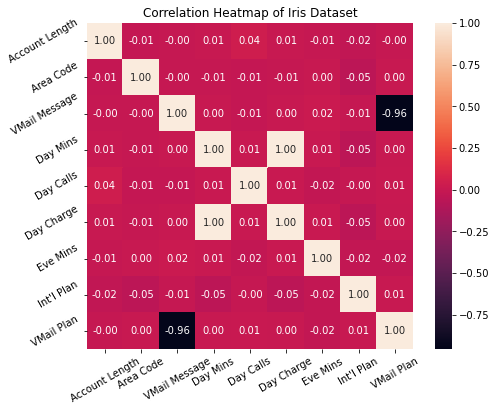

In [12]:
import seaborn as sns
plt.figure(figsize=(8,6))
plt.title('Correlation Heatmap of Iris Dataset')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()    


In [13]:
 # Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Int'l Plan,VMail Plan
Account Length,NaN,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,-0.024735,-0.002918
Area Code,NaN,NaN,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.048551,0.000747
VMail Message,NaN,NaN,NaN,0.000778,-0.009548,0.000776,0.017562,-0.008745,-0.956927
Day Mins,NaN,NaN,NaN,NaN,0.006750,1.000000,0.007043,-0.049396,0.001684
Day Calls,NaN,NaN,NaN,NaN,NaN,0.006753,-0.021451,-0.003755,0.011086
Day Charge,NaN,NaN,NaN,NaN,NaN,NaN,0.007050,-0.049398,0.001686
Eve Mins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.019100,-0.021545
Int'l Plan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006006
VMail Plan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
upper = abs(upper)
upper

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Int'l Plan,VMail Plan
Account Length,NaN,0.012463,0.004628,0.006216,0.038470,0.006214,0.006757,0.024735,0.002918
Area Code,NaN,NaN,0.001994,0.008264,0.009646,0.008264,0.003580,0.048551,0.000747
VMail Message,NaN,NaN,NaN,0.000778,0.009548,0.000776,0.017562,0.008745,0.956927
Day Mins,NaN,NaN,NaN,NaN,0.006750,1.000000,0.007043,0.049396,0.001684
Day Calls,NaN,NaN,NaN,NaN,NaN,0.006753,0.021451,0.003755,0.011086
Day Charge,NaN,NaN,NaN,NaN,NaN,NaN,0.007050,0.049398,0.001686
Eve Mins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.019100,0.021545
Int'l Plan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006006
VMail Plan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print(to_drop)

['Day Charge', 'VMail Plan']


## Métodos de envoltura (Wrapper Methods)

En los métodos de envoltura, intentamos utilizar un subconjunto de características y entrenar un modelo con ellas. Basándonos en las inferencias que sacamos del modelo anterior, decidimos añadir o eliminar características del subconjunto. El problema se reduce esencialmente a un problema de búsqueda. Estos métodos suelen ser computacionalmente muy caros.

Algunos ejemplos comunes de métodos de envoltura son:
* Selección hacia delante,
* Eliminación hacia atrás,
* Selección exhaustiva de características            
* Eliminación recursiva de características.
* Eliminación recursiva de características con validación cruzada



In [16]:
from IPython.display import Image
Image(url= "https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1537549832/Image2_ajaeo8.png", width=900)


### Selección hacia adelante
La selección hacia delante (Forward) es un método iterativo en el que empezamos por no tener ninguna característica en el modelo. En cada iteración, vamos añadiendo la característica que mejor mejore nuestro modelo hasta que la adición de una nueva variable no mejore el rendimiento del modelo.

El procedimiento comienza con un conjunto vacío de características (conjunto reducido). Se determina la mejor de las características originales y se añade al conjunto reducido. En cada iteración posterior, se añade al conjunto el mejor de los atributos originales restantes.

La selección de características paso a paso comienza evaluando todas las características individualmente y selecciona la que genera el algoritmo de mejor rendimiento, según un criterio de evaluación preestablecido. En el segundo paso, se evalúan todas las posibles combinaciones de la característica seleccionada y una segunda característica, y se selecciona la pareja que produce el algoritmo de mejor rendimiento, según los mismos criterios preestablecidos.

Los criterios preestablecidos pueden ser el roc_auc para la clasificación y la r al cuadrado para la regresión, por ejemplo.

Este procedimiento de selección se llama codicioso, porque evalúa todas las posibles combinaciones de características simples, dobles, triples, etc. Por lo tanto, es bastante caro computacionalmente, y a veces, si el espacio de características es grande, incluso inviable.

In [17]:
import pandas as pd
import numpy as np

# read in the data
url = 'https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/hitters.csv'
hitters = pd.read_csv(url)

# remove rows with missing values
hitters.dropna(inplace=True)
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [18]:
# encode categorical variables as integers
hitters['League'] = pd.factorize(hitters.League)[0]
hitters['Division'] = pd.factorize(hitters.Division)[0]
hitters['NewLeague'] = pd.factorize(hitters.NewLeague)[0]
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,0,0,632,43,10,475.0,0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,1,0,880,82,14,480.0,1
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,0,1,200,11,3,500.0,0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,0,1,805,40,4,91.5,0
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,1,0,282,421,25,750.0,1


In [19]:
# define features: exclude career statistics (which start with "C") and the response (Salary)
feature_cols = hitters.columns[hitters.columns.str.startswith('C') == False].drop('Salary')
feature_cols


Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'League',
       'Division', 'PutOuts', 'Assists', 'Errors', 'NewLeague'],
      dtype='object')

In [20]:
# define X and y
X = hitters[feature_cols]
y = (hitters.Salary > 425).astype(int)

In [21]:
# separate train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((184, 13), (79, 13))

In [25]:
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier

sfs1 = SFS(RandomForestClassifier(), 
           k_features=10, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='roc_auc',
           cv=3)

sfs1 = sfs1.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    7.8s finished

[2022-10-28 22:45:37] Features: 1/10 -- score: 0.770782930107527[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    5.4s finished

[2022-10-28 22:45:43] Features: 2/10 -- score: 0.9053707437275986[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    4.9s finished

[2022-10-28 22:45:47] Features: 3/10 -- score: 0.9204357078853046[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [28]:
print("Variables originales dataset:", X_train.columns)
print("Variables seleccionadas :",X_train.columns[list(sfs1.k_feature_idx_)])



Variables originales dataset: Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'League',
       'Division', 'PutOuts', 'Assists', 'Errors', 'NewLeague'],
      dtype='object')
Variables seleccionadas : Index(['AtBat', 'Hits', 'HmRun', 'RBI', 'Walks', 'Years', 'League', 'Division',
       'Errors', 'NewLeague'],
      dtype='object')


### Eliminación hacia atrás

En la eliminación hacia atrás, comenzamos con todas las características y eliminamos la característica menos significativa en cada iteración, lo que mejora el rendimiento del modelo. Se repite esta operación hasta que no se observe ninguna mejora en la eliminación de características.

El procedimiento comienza con el conjunto completo de atributos. En cada paso, se elimina el peor atributo que queda en el conjunto.

In [29]:
sfs1 = SFS(RandomForestClassifier(), 
           k_features=10, 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='roc_auc',
           cv=3)

sfs1 = sfs1.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    6.0s finished

[2022-10-28 22:46:34] Features: 12/10 -- score: 0.905516353046595[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    5.6s finished

[2022-10-28 22:46:40] Features: 11/10 -- score: 0.9037914426523298[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    5.1s finished

[2022-10-28 22:46:45] Features: 10/10 -- score: 0.9143201164874551

In [30]:
print("Variables originales dataset:", X_train.columns)
print("Variables seleccionadas :",X_train.columns[list(sfs1.k_feature_idx_)])



Variables originales dataset: Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'League',
       'Division', 'PutOuts', 'Assists', 'Errors', 'NewLeague'],
      dtype='object')
Variables seleccionadas : Index(['Hits', 'HmRun', 'Runs', 'RBI', 'Years', 'League', 'Division',
       'Assists', 'Errors', 'NewLeague'],
      dtype='object')


### Selección exhaustiva de características

En una selección exhaustiva de características se selecciona el mejor subconjunto de características, de entre todos los posibles subconjuntos de características, optimizando una métrica de rendimiento específica para un determinado algoritmo de aprendizaje automático. Por ejemplo, si el clasificador es una regresión logística y el conjunto de datos consta de 4 características, el algoritmo evaluará las 15 combinaciones de características de la siguiente manera
* todas las combinaciones posibles de 1 característica
* todas las combinaciones posibles de 2 características
* todas las combinaciones posibles de 3 características
* todas las 4 características

y seleccionará la que dé como resultado el mejor rendimiento (por ejemplo, la precisión de la clasificación) del clasificador de regresión logística.

Este es otro algoritmo codicioso, ya que evalúa todas las combinaciones posibles de características. Es bastante caro desde el punto de vista computacional, y a veces, si el espacio de características es grande, incluso inviable.

### Eliminación recursiva de características

Se trata de un algoritmo de optimización codicioso cuyo objetivo es encontrar el subconjunto de características de mejor rendimiento. Crea modelos repetidamente y deja de lado la característica de mejor o peor rendimiento en cada iteración. Construye el siguiente modelo con las características restantes hasta que se agotan todas las características. A continuación, clasifica las características en función del orden de su eliminación.

La eliminación recursiva de características realiza una búsqueda codiciosa para encontrar el subconjunto de características de mejor rendimiento. Crea modelos de forma iterativa y determina la característica con mejor o peor rendimiento en cada iteración. Construye los siguientes modelos con las características restantes hasta que se exploran todas las características. A continuación, clasifica las características en función de su orden de eliminación. En el peor de los casos, si un conjunto de datos contiene N características, RFE realizará una búsqueda codiciosa de 2N combinaciones de características.

In [31]:
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score

rf = RandomForestClassifier()
rfe = RFE(estimator=rf, n_features_to_select=1, step=1)
rfe.fit(X_train, y_train)
y_pred = rfe.predict(X_test)

print("Roc-auc:", roc_auc_score(y_pred,y_test))

Roc-auc: 0.6931972789115647


### Eliminación recursiva de características con validación cruzada

La técnica de selección de características de eliminación recursiva con validación cruzada (RFECV) selecciona el mejor subconjunto de características para el estimador eliminando de 0 a N características de forma iterativa mediante la eliminación recursiva de características.

A continuación, selecciona el mejor subconjunto en función de la precisión o la puntuación de validación cruzada o roc-auc del modelo. La técnica de eliminación recursiva de características elimina n características de un modelo ajustando el modelo varias veces y, en cada paso, eliminando las características más débiles.


In [32]:
from sklearn.feature_selection import RFECV

rf = RandomForestClassifier()
rfe = RFECV(estimator=rf,
            min_features_to_select=1,
            step=1)
rfe.fit(X_train, y_train)
y_pred = rfe.predict(X_test)

print("Roc-auc:", roc_auc_score(y_pred,y_test))

Roc-auc: 0.8519480519480519


## Métodos embebidos

Los métodos embebidos son iterativos en el sentido de que se ocupan de cada iteración del proceso de entrenamiento del modelo y extraen cuidadosamente las características que más contribuyen al entrenamiento de una iteración concreta. Los métodos de regularización son los métodos incrustados más utilizados que penalizan una característica dado un umbral de coeficiente.

Por ello, los métodos de regularización también se denominan métodos de penalización que introducen restricciones adicionales en la optimización de un algoritmo de predicción (como un algoritmo de regresión) que sesgan el modelo hacia una menor complejidad (menos coeficientes).

Algunos de los ejemplos más populares de estos métodos son LASSO y la regresión RIDGE, que llevan incorporadas funciones de penalización para reducir el sobreajuste. O la importancia de las características en árboles de decisión o su ampliación, los bosques aleatorios.

In [33]:
from IPython.display import Image
Image(url= "https://www.analyticsvidhya.com/wp-content/uploads/2016/11/Embedded_1.png", width=900)


## Cómo elegir el método de selección de características adecuado


Podemos ver que hay muchas técnicas de selección de características disponibles.

El siguiente gráfico le servirá de guía para elegir un método de selección de características



In [34]:
from IPython.display import Image
Image(url= "https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/11/How-to-Choose-Feature-Selection-Methods-For-Machine-Learning.png", width=900)


Fuente: [Comprehensive Guide on Feature Selection](https://www.kaggle.com/prashant111/comprehensive-guide-on-feature-selection)